In [1]:
import numpy as np
from scipy.stats import norm
from scipy.stats import poisson
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
p = [0.10, 0.41, 0, 0.334]
q = [0.11, 0.45, 0.12, 0.345]

In [3]:
def kl(p, q):
    result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
    return result

In [4]:
x = np.arange(-10, 10, 0.001)
len(x)

20000

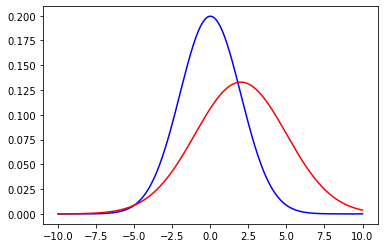

In [5]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 2, 3)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [6]:
kl(p, q)

349.91348337868124

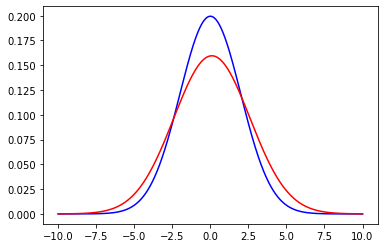

In [7]:
p = norm.pdf(x, 0, 2)
q = norm.pdf(x, 0.1, 2.5)
plt.plot(x, p, c='blue')
plt.plot(x, q, c='red')

In [8]:
kl(p, q)

43.94620233653506

In [9]:
data = pd.read_csv('weight-height.csv')
data.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [10]:
data.groupby('Gender').mean()

,Height,Weight
Gender,,
Female,63.708774,135.860093
Male,69.026346,187.020621


<AxesSubplot:>

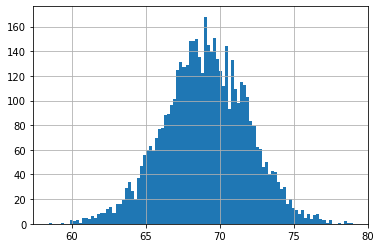

In [11]:
males = data[data['Gender'] == 'Male']['Height']
males.hist(bins=100)

In [12]:
males.describe()['mean']

69.02634590621737

In [13]:
males.describe()['std']

2.863362228660651

In [14]:
count, devision = np.histogram(males, bins=100)
print(count)
print(devision)

[  1   0   0   0   1   0   0   3   2   3   1   5   5   4   6   5   8   9
   9  12  14   9  16  16  19  29  34  27  20  37  47  56  60  63  59  70
  77  78  88  89  96 101 125 131 127 129 148 148 150 135 122 168 145 139
 151 134 124 112 144  93 133 109  98 115 113 103  83  79  62  61  46  50
  40  43  42  34  28  30  16  20  13  11   8  11   5   8   4   7   8   4
   3   1   3   0   0   1   0   2   1   1]
[58.40690493 58.61282331 58.81874168 59.02466005 59.23057843 59.4364968
 59.64241518 59.84833355 60.05425192 60.2601703  60.46608867 60.67200705
 60.87792542 61.0838438  61.28976217 61.49568054 61.70159892 61.90751729
 62.11343567 62.31935404 62.52527241 62.73119079 62.93710916 63.14302754
 63.34894591 63.55486429 63.76078266 63.96670103 64.17261941 64.37853778
 64.58445616 64.79037453 64.9962929  65.20221128 65.40812965 65.61404803
 65.8199664  66.02588478 66.23180315 66.43772152 66.6436399  66.84955827
 67.05547665 67.26139502 67.46731339 67.67323177 67.87915014 68.08506852
 68.290986

In [15]:
ideal = norm.rvs(size=len(males), loc=males.describe()['mean'], scale=males.describe()['std'])
print(ideal)

[65.85885549 67.59496954 67.61664296 ... 68.43188538 68.73863153
 63.98900597]


In [16]:
icount, idevision = np.histogram(ideal, bins=100)
print(icount)
print(idevision)

[  1   0   0   0   1   1   0   0   2   1   3   2   3   3   3   8   7   4
  14  10   8  14  12  24  17  16  30  32  35  33  41  43  70  50  83  69
  81 109  86 108  79 117 117 132 123 152 144 132 148 137 130 151 145 140
 127 141 134 135 123 131 114 132 103  81  81  99  82  66  68  67  52  52
  56  39  33  27  30  32  28  17  14  11   2   9   7   7   6   2   2   4
   2   1   3   2   3   0   0   2   1   1]
[58.2542636  58.46394729 58.67363099 58.88331469 59.09299838 59.30268208
 59.51236578 59.72204947 59.93173317 60.14141687 60.35110056 60.56078426
 60.77046796 60.98015165 61.18983535 61.39951905 61.60920274 61.81888644
 62.02857014 62.23825384 62.44793753 62.65762123 62.86730493 63.07698862
 63.28667232 63.49635602 63.70603971 63.91572341 64.12540711 64.3350908
 64.5447745  64.7544582  64.96414189 65.17382559 65.38350929 65.59319298
 65.80287668 66.01256038 66.22224407 66.43192777 66.64161147 66.85129516
 67.06097886 67.27066256 67.48034626 67.69002995 67.89971365 68.10939735
 68.319081

(array([  1.,   0.,   0.,   0.,   1.,   1.,   0.,   0.,   2.,   1.,   3.,
          2.,   3.,   3.,   3.,   8.,   7.,   4.,  14.,  10.,   8.,  14.,
         12.,  24.,  17.,  16.,  30.,  32.,  35.,  33.,  41.,  43.,  70.,
         50.,  83.,  69.,  81., 109.,  86., 108.,  79., 117., 117., 132.,
        123., 152., 144., 132., 148., 137., 130., 151., 145., 140., 127.,
        141., 134., 135., 123., 131., 114., 132., 103.,  81.,  81.,  99.,
         82.,  66.,  68.,  67.,  52.,  52.,  56.,  39.,  33.,  27.,  30.,
         32.,  28.,  17.,  14.,  11.,   2.,   9.,   7.,   7.,   6.,   2.,
          2.,   4.,   2.,   1.,   3.,   2.,   3.,   0.,   0.,   2.,   1.,
          1.]),
 array([58.2542636 , 58.46394729, 58.67363099, 58.88331469, 59.09299838,
        59.30268208, 59.51236578, 59.72204947, 59.93173317, 60.14141687,
        60.35110056, 60.56078426, 60.77046796, 60.98015165, 61.18983535,
        61.39951905, 61.60920274, 61.81888644, 62.02857014, 62.23825384,
        62.44793753, 62.65

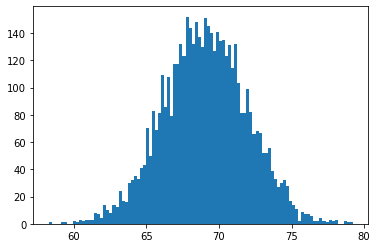

In [17]:
plt.hist(ideal, bins=100)

In [18]:
kl(count, icount)

C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


102.17597944782699

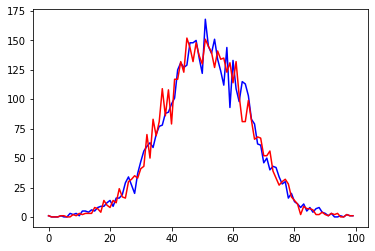

In [19]:
plt.plot(count, c='blue')
plt.plot(icount, c='red')

In [20]:
count = count / 5000

In [21]:
icount = icount / 5000

In [22]:
kl(count, icount)

C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: divide by zero encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: invalid value encountered in true_divide
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: divide by zero encountered in log
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))
C:\Users\kavia\AppData\Local\Temp\ipykernel_14324\4271909869.py:2: RuntimeWarning: invalid value encountered in multiply
  result = np.sum(np.where(np.logical_and(p != 0, q != 0), p * np.log(p / q), 0))


0.020435195889565383

In [ ]:
# Masoud Kaviani